# Import dependencies

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

plt.style.use('ggplot')
random_state = 42

# Read data 

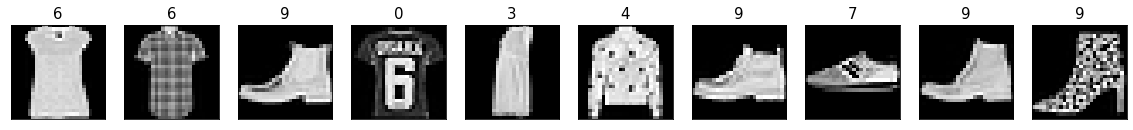

In [2]:
df = pd.read_csv('fashion-mnist.csv')

y = df.loc[:, 'y'].copy().values
X = df.drop(['y'], axis=1).copy().values

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[i].reshape(28, 28))
    plt.gray()
    plt.title('{}'.format((y[i])), fontsize=15)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

# Split data

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.5, random_state=random_state, shuffle=True, stratify=y)

In [4]:
print(collections.Counter(y_valid))
print(collections.Counter(y_train))

Counter({7: 519, 2: 515, 3: 508, 8: 507, 6: 506, 1: 500, 9: 500, 4: 494, 0: 492, 5: 459})
Counter({7: 520, 2: 515, 3: 508, 8: 506, 6: 506, 9: 501, 1: 500, 4: 494, 0: 492, 5: 458})


# Applied algorithms 

In [5]:
def print_accuracy_confusion(clf, X, y):
    print('Accuracy on validation set: {}'.format(
        (y_valid == clf.predict(X_valid)).sum()/len(y_valid)))
    print(confusion_matrix(y_valid, clf.predict(X_valid)))

## SVM with Linear Kernel 

In [6]:
lin_clf = LinearSVC()

In [7]:
lin_clf.fit(X_train, y_train)

/home/alireza/anaconda3/envs/ml-project/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [8]:
print_accuracy_confusion(lin_clf, X_valid, y_valid)

Accuracy on validation set: 0.7628
[[317   9  20  27   7   1 100   2   9   0]
 [  2 477   5   7   3   0   5   0   1   0]
 [ 11   6 344   6  44   2  93   1   7   1]
 [ 36  20  16 384   7   1  36   0   4   4]
 [  5   1  65  20 258   1 136   0   8   0]
 [  5   0   7   3   4 364   4  44  12  16]
 [ 60   6  61  17  34   1 318   0   9   0]
 [  1   0   0   0   0  23   3 455   3  34]
 [  7   1  12   6   3   4  19   4 450   1]
 [  3   0   1   1   0  16   4  28   0 447]]


## SVM with RBF Kernel 

### Hyperparameter testing

Choose the best gamma based on performance on validation set: 

In [9]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
gamma_range = np.logspace(-8, 3, 12)
results = []
rbf_classifiers = []
for gamma in gamma_range:
    rbf_svc = SVC(kernel='rbf', gamma=gamma)
    rbf_svc.fit(X_train, y_train)
    rbf_classifiers.append(
        (rbf_svc, gamma, (y_valid == rbf_svc.predict(X_valid)).sum()/len(y_valid)))

In [10]:
best = max(rbf_classifiers, key=lambda res: res[2])

In [11]:
print('Best gamma is {} with {} accuracy'.format(best[1], best[2]))

Best gamma is 1e-07 with 0.8422 accuracy


In [12]:
print_accuracy_confusion(best[0], X_valid, y_valid)

Accuracy on validation set: 0.8422
[[414   2   4  31   1   0  31   0   9   0]
 [  2 474   8  14   1   0   1   0   0   0]
 [ 11   0 383   8  60   0  45   0   8   0]
 [ 26   3   1 462   7   0   8   0   1   0]
 [  2   0  33  16 384   0  57   0   2   0]
 [  0   0   0   0   0 401   0  41   5  12]
 [ 89   1  68  16  41   0 286   0   5   0]
 [  0   0   0   0   0  15   0 464   1  39]
 [  3   0   1   2   1   2   9   0 489   0]
 [  0   0   0   0   0  10   0  36   0 454]]


## K-Nearest Neighbors 

Choose the best k based on performance on validation set: 

In [13]:
k_opts = [5, 10, 15, 20]
neigh_classifiers = []
for k in k_opts:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    neigh_classifiers.append(
        (neigh, k, (y_valid == neigh.predict(X_valid)).sum()/len(y_valid)))

In [14]:
best = max(rbf_classifiers, key=lambda res: res[2])

In [15]:
print('Best k is {} with {} accuracy'.format(best[1], best[2]))

Best k is 1e-07 with 0.8422 accuracy


In [16]:
print_accuracy_confusion(best[0], X_valid, y_valid)

Accuracy on validation set: 0.8422
[[414   2   4  31   1   0  31   0   9   0]
 [  2 474   8  14   1   0   1   0   0   0]
 [ 11   0 383   8  60   0  45   0   8   0]
 [ 26   3   1 462   7   0   8   0   1   0]
 [  2   0  33  16 384   0  57   0   2   0]
 [  0   0   0   0   0 401   0  41   5  12]
 [ 89   1  68  16  41   0 286   0   5   0]
 [  0   0   0   0   0  15   0 464   1  39]
 [  3   0   1   2   1   2   9   0 489   0]
 [  0   0   0   0   0  10   0  36   0 454]]


## Decision Tree

In [17]:
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [18]:
print_accuracy_confusion(dt, X_valid, y_valid)

Accuracy on validation set: 0.73
[[321   8   8  37   8   3  91   0  15   1]
 [  4 469   0  19   1   2   4   0   1   0]
 [ 15   5 310  14  79   3  71   0  16   2]
 [ 32  24   9 388  19   2  30   0   4   0]
 [  1   7  85  34 296   0  66   0   5   0]
 [  2   2   1   2   0 353   0  49  34  16]
 [ 83   3  74  30  63   1 239   1  11   1]
 [  0   1   0   0   1  34   1 434   6  42]
 [  4   8   7  11  12   9  13  10 430   3]
 [  1   0   0   1   3  24   2  48  11 410]]


## Neural Network 

Choose the best activation function based on performance on validation set: 

In [19]:
activation_opts = ['logistic', 'tanh', 'relu']
nn_classifiers = []
for activation in activation_opts:
    nn = MLPClassifier(hidden_layer_sizes=(100, 100),
                       solver='sgd', activation=activation, max_iter=100)
    nn.fit(X_train, y_train)
    nn_classifiers.append(
        (nn, activation, (y_valid == nn.predict(X_valid)).sum()/len(y_valid)))

/home/alireza/anaconda3/envs/ml-project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on validation set: 0.724
[[407   7  10  33   2   0  22   0  11   0]
 [  8 469   5  13   1   0   3   0   1   0]
 [ 12   0 385   7  66   0  31   0  14   0]
 [ 50   2   1 432   4   0  19   0   0   0]
 [  8   3 129  21 306   0  23   0   4   0]
 [  0   0   0   0   0 171   0 155  16 117]
 [113   1 251  11  55   0  63   0  12   0]
 [  0   0   0   0   0   6   0 459   1  53]
 [  3   0  10   8   4   2   7   4 469   0]
 [  0   0   0   0   0   3   0  37   1 459]]


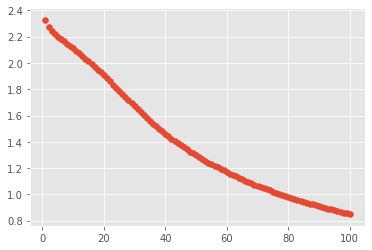

Accuracy on validation set: 0.775
[[384   8   5  32   4   1  35   0  23   0]
 [  2 469   8  14   2   0   5   0   0   0]
 [ 11   2 240   5 176   0  66   0  15   0]
 [ 29   3   0 429  25   0  20   0   2   0]
 [  1   2  22  14 408   0  38   0   9   0]
 [  0   0   0   0   0 376   0  44   6  33]
 [113   2  39  15 132   0 186   0  19   0]
 [  0   0   0   0   0  19   0 449   1  50]
 [  2   1   2   2   8   5   4   2 481   0]
 [  0   0   0   0   0  12   0  34   1 453]]


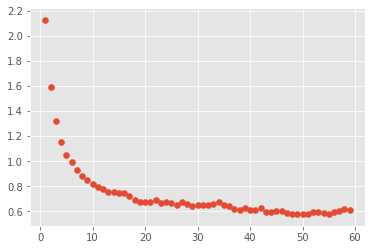

Accuracy on validation set: 0.1016
[[  0   0   0 492   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0 515   0   0   0   0   0   0]
 [  0   0   0 508   0   0   0   0   0   0]
 [  0   0   0 494   0   0   0   0   0   0]
 [  0   0   0 458   0   0   0   0   1   0]
 [  0   0   0 506   0   0   0   0   0   0]
 [  0   0   0 519   0   0   0   0   0   0]
 [  0   0   0 507   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]]


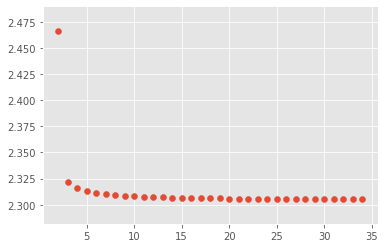

In [25]:
for nn, activation, accuracy in nn_classifiers:
    print_accuracy_confusion(nn, X_valid, y_valid)
    plt.scatter(list(range(1, len(nn.loss_curve_)+1)), nn.loss_curve_)
    plt.show()

In [21]:
best = max(nn_classifiers, key=lambda res: res[2])

In [22]:
print('Best activation is {} with {} accuracy'.format(best[1], best[2]))

Best activation is tanh with 0.775 accuracy


In [23]:
print_accuracy_confusion(best[0], X_valid, y_valid)

Accuracy on validation set: 0.775
[[384   8   5  32   4   1  35   0  23   0]
 [  2 469   8  14   2   0   5   0   0   0]
 [ 11   2 240   5 176   0  66   0  15   0]
 [ 29   3   0 429  25   0  20   0   2   0]
 [  1   2  22  14 408   0  38   0   9   0]
 [  0   0   0   0   0 376   0  44   6  33]
 [113   2  39  15 132   0 186   0  19   0]
 [  0   0   0   0   0  19   0 449   1  50]
 [  2   1   2   2   8   5   4   2 481   0]
 [  0   0   0   0   0  12   0  34   1 453]]
